<h1 style="font-size:30px;">Human Pose Estimation</h1> 

Human pose estimation is a rapidly evolving subject in the field of computer vision. Many companies, including tech giants like Microsoft, Google, Apple etc, have been working on building robust ML solutions for human pose estimation. The applications are limitless. For example, it can form the basis for sign language recognition, posture correction, exercise and finess, gesture control, and sports training. It can also enable the overlay of digital content on top of the physical world in augmented reality applications. 

In this notebook, we will demonstrate the use of Google's [**MediaPipe Pose**](https://google.github.io/mediapipe/solutions/pose.html) model to:

1. Detect and draw pose landmarks
2. Draw landmark connections
3. Acquire the pixel coordinates of landmarks

<br>
<center>
<img src="https://opencv.org/wp-content/uploads/2021/10/c0-m17-01-Feature-Image.png" alt="Human Pose Estimation">
</center>
<br>

The connected keypoint skeleton shown below is a way to visualize the human pose. Based on the position of the keypoints in 2D or 3D coordinate system, decisions can be taken. Apart from the skeleton-based model, other models that are used in human pose visualization are, contour-based and volume-based models. All of them have their advantages and disadvantages. MediaPipe uses a skeleton-based 3D model called Pose Landmark Model (BlazePose GHUM 3D). The landmark model predicts the location of 33 pose landmarks or keypoints as shown below.

<br>
<center>
<img src="https://opencv.org/wp-content/uploads/2021/10/c0-m17-mediapipe-pose-landmarks.png" alt="Pose landmarks">
</center>
<br>

## 1. Pose Estimation in Images
Before we apply this model to videos, let's see how it is implemented on individual images. Note that the images must contain a person to detect the pose.

In [1]:
if 'google.colab' in str(get_ipython()):
    print("Downloading Code to Colab Environment")
    !wget https://www.dropbox.com/sh/gz8x999ela84qr2/AABHRkHY_QALmo6JHSpOruA8a?dl=1 -O module-code.zip -q --show-progress
    !unzip -qq module-code.zip
    !pip install --upgrade opencv-contrib-python
    !pip install mediapipe
else:
    pass

In [2]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
%matplotlib inline

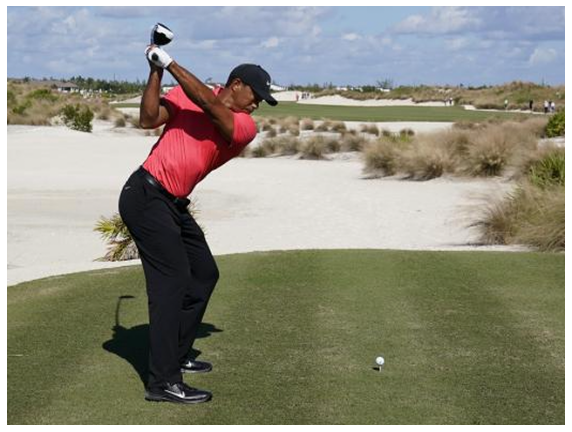

In [3]:
img = cv2.imread("Tiger_Woods.png")

img_width = img.shape[1]
img_height = img.shape[0]

plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(img[:,:,::-1]);

# 1. Initialize MediaPipe
Before we can use MediaPipe to process an image and draw landmarks and connections we must create the following MediaPipe objects from `mp.solutions`, as shown below. 

In [4]:
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

# 2. Process Image and Draw Landmarks

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


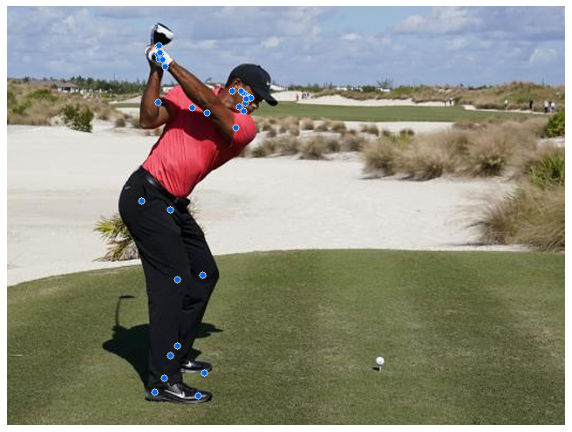

In [5]:
with mp_pose.Pose(static_image_mode = True) as pose:
        
    # Make a copy of the original image.
    annotated_img = img.copy()
    
    # Process image.
    results = pose.process(img)
    
    # Draw landmarks.
    circle_radius = int(.007*img_height) # Scale landmark circles as percentage of image height.
    
    # Specify landmark drawing style.
    point_spec = mp_drawing.DrawingSpec(color=(220, 100, 0), thickness=-1, circle_radius=circle_radius)
    
    # Draw landmark points.
    mp_drawing.draw_landmarks(annotated_img, 
                              landmark_list=results.pose_landmarks,   
                              landmark_drawing_spec=point_spec)
plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(annotated_img[:,:,::-1]);

# 3. Draw Landmark Connections
In order to draw the connections between adjacent landmark ponts we need to pass `POSE_CONNECTIONS` to the `draw_landmarks()` method.

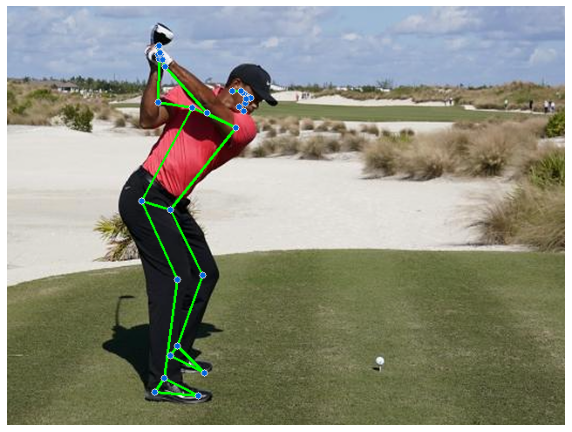

In [6]:
# Make a copy of the original image.
annotated_img = img.copy()

# Specify landmark connections drawing style.
line_spec = mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2)
    
# Draw both landmark points and connections.
mp_drawing.draw_landmarks(annotated_img, 
                          landmark_list=results.pose_landmarks, 
                          connections=mp_pose.POSE_CONNECTIONS, 
                          landmark_drawing_spec=point_spec,
                          connection_drawing_spec=line_spec)

plt.figure(figsize = (10,10))
plt.axis('off')
plt.imshow(annotated_img[:,:,::-1]);

# 4. Acquire Landmark Coordinates

Acquiring the landmark cordinates is often required for follow-on processing in many applications so that additional quantities can be computed such as angles and distances.

In [7]:
r_hip_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].x * img_width)
r_hip_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HIP].y * img_height)

l_hip_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].x * img_width)
l_hip_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HIP].y * img_height)

print('Right hip coordinates : (', r_hip_x,',',r_hip_y,')' )
print('Left hip coordinates  : (', l_hip_x,',',l_hip_y,')' )


Right hip coordinates : ( 154 , 223 )
Left hip coordinates  : ( 187 , 233 )
